# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [3]:
#your code here

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder


# Drop all rows with any null values (simplifies processing, but loses data)
spaceship = spaceship.dropna()

# Drop columns that won't help or have too many unique values
cols_to_drop = ["Name", "PassengerId", "Cabin", "Destination", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
spaceship = spaceship.drop(columns=[col for col in cols_to_drop if col in spaceship.columns])

# Label encode categorical columns
cat_cols = spaceship.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    spaceship[col] = le.fit_transform(spaceship[col].astype(str))

y = spaceship["Transported"].astype(int)
X = spaceship.drop("Transported", axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

c:\Users\Player One\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=3. All the features will be returned.
  warnings.warn(


Selected features: ['HomePlanet', 'CryoSleep', 'Age']


- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [4]:
#your code here

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

base_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Bagging (with replacement)
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=50,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

# Pasting (without replacement)
pasting_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=50,
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)
pasting_clf.fit(X_train, y_train)
y_pred_pasting = pasting_clf.predict(X_test)
print("Pasting Accuracy:", accuracy_score(y_test, y_pred_pasting))

Bagging Accuracy: 0.7413010590015129
Pasting Accuracy: 0.7443267776096822


- Evaluate your model

Accuracy: 0.7413010590015129

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77       653
           1       0.82      0.62      0.71       669

    accuracy                           0.74      1322
   macro avg       0.76      0.74      0.74      1322
weighted avg       0.76      0.74      0.74      1322



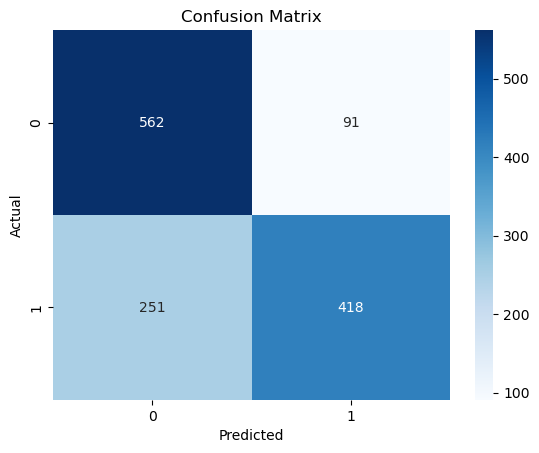

In [5]:
#your code here

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = bagging_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [6]:
#your code here

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

base_clf = DecisionTreeClassifier(random_state=42)

bagging_clf = BaggingClassifier(estimator=base_clf, random_state=42)

param_grid = {
    'n_estimators': [10, 30, 50, 100],
    'estimator__max_depth': [3, 5, 7, None],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=bagging_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

- Run Grid Search

In [7]:
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Test accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best params: {'bootstrap': True, 'estimator__max_depth': 3, 'n_estimators': 10}
Test accuracy: 0.7390317700453858


- Evaluate your model

Accuracy: 0.7390317700453858

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76       653
           1       0.82      0.63      0.71       669

    accuracy                           0.74      1322
   macro avg       0.75      0.74      0.74      1322
weighted avg       0.75      0.74      0.74      1322



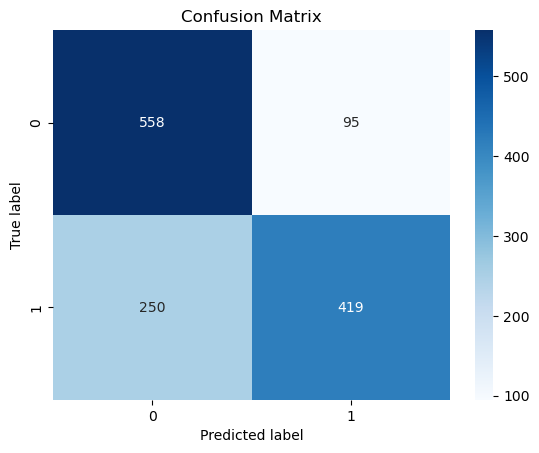

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = best_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()